### Load the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("restaurant_tips-outlier.csv")

In [3]:
df

,Total bill amount,Tip amount
0,112,11
1,110,10
2,10,1
3,75,8
4,95,9
5,120,13
6,79,8
7,99,10
8,121,13
9,70,8


### Visualization of Outliers

In [4]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1662801db70>,
 'caps': [<matplotlib.lines.Line2D at 0x16628033470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1662801da20>],
 'medians': [<matplotlib.lines.Line2D at 0x16628033cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1662803a128>],
 'means': []}

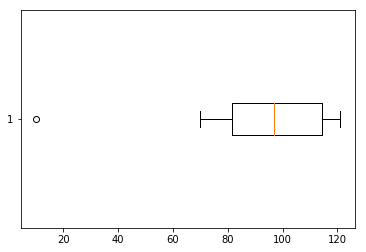

In [5]:
plt.boxplot(df["Total bill amount"], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x166280ad5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x166280adeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x166280ad4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x166280b5748>],
 'fliers': [<matplotlib.lines.Line2D at 0x166280b5b70>],
 'means': []}

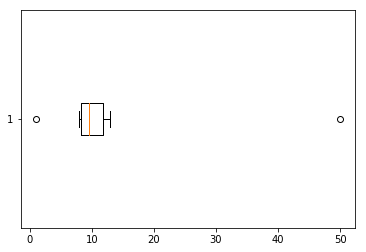

In [6]:
plt.boxplot(df["Tip amount"], vert = False)

### Quartiles

In [7]:
Q1 = df.quantile(.25); Q3 = df.quantile(.75); IQR = Q3 - Q1 

In [8]:
IQR  

Total bill amount    32.75
Tip amount            3.50
dtype: float64

In [9]:
LB = Q1 - IQR * 1.5
LB

Total bill amount    32.375
Tip amount            3.000
dtype: float64

In [10]:
UB = Q3 + IQR * 1.5

### Imputation 

In [11]:
#df = df[(df > LB) & (df < UB)].dropna()
#df = df[(df > LB) & (df < UB)].fillna(df.mean())
#df = df[(df > LB) & (df < UB)].fillna(df.median())
#df = df[df > LB].fillna(LB); df = df[df < UB].fillna(UB)

In [12]:
df

,Total bill amount,Tip amount
0,112,11
1,110,10
2,10,1
3,75,8
4,95,9
5,120,13
6,79,8
7,99,10
8,121,13
9,70,8


### Import the model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
x = df["Total bill amount"].values.reshape(-1,1)
y = df["Tip amount"]

### Fit the model

In [16]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predict

In [17]:
lm.predict(100)

array([13.46681429])

In [18]:
lm.coef_

array([0.17712525])

In [19]:
lm.intercept_

-4.245710984884957

### Accuracy`

In [20]:
lm.score(x,y)

0.21156137629546953

In [21]:
import seaborn as sns

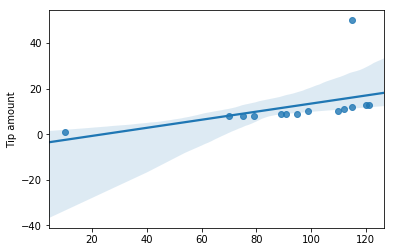

In [22]:
sns.regplot(x,y)